## 6. GEM_MOM_Backtest

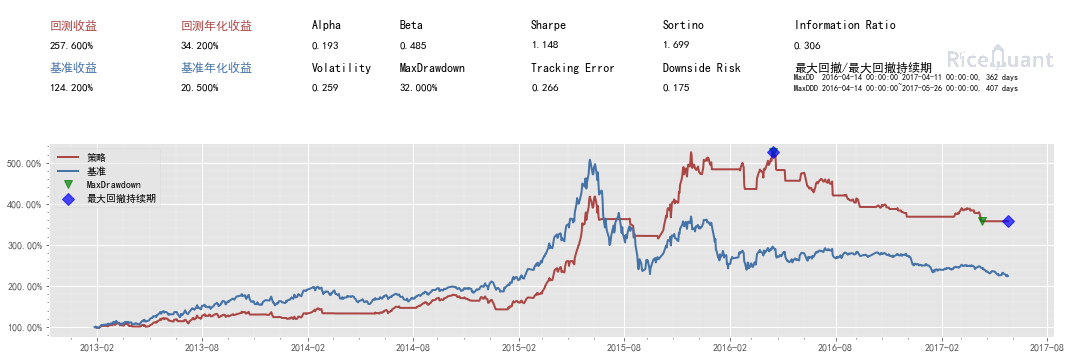

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2013-01-28  215.76     999784.24                  1.000   1000000.00   
  2013-01-29  215.76    1008587.58                  1.000   1008803.34   
  2013-01-30  215.76     998408.32                  1.009    998624.08   
  2013-01-31  215.76     988624.00                  0.999    988839.76   
  2013-02-01  215.76     996726.64                  0.989    996942.40   
  2013-02-04  215.76     983400.60                  0.997    983616.36   
  2013-02-05  215.76     994968.52                  0.984    995184.28   
  2013-02-06  215.76    1008065.24                  0.995   1008281.00   
  2013-02-07  215.76    1026321.66                  1.008   1026537.42   
  2013-02-08  215.76    1048540.22                  1.027   1048755.98   
  2013-02-18  215.76    1064146.72                  1.049   1064362.48   

In [4]:
# coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import numpy as np
import talib as ta
import pandas as pd
import os
import rqalpha
from rqalpha.api import *
from fxdayu_data import DataAPI

def init(context):
    DataAPI.set_file('D:/PycharmProjects/Quant_Alpha/Data_Manager/Valuation_Selection/config.py')
    df = DataAPI.candle('sz399006', 'D')
    df['MA_hedge'] = ta.abstract.MA(df, 30)
    context.df = df
    codes = pd.read_excel('D:/PycharmProjects/Quant_Alpha/Momentun_Hedge/GEM_MOM.xlsx')
    codes.index = codes.pop('date')
    context.codes = codes
    scheduler.run_weekly(find_pool, tradingday=1)

def find_pool(context, bar_dict):
    codes = context.codes.loc[context.now]
    stocks = codes.index[codes == True]
    context.stocks = stocks

def handle_bar(context, bar_dict):
    if can_trade(context):
        buy(context, bar_dict)

def buy(context, bar_dict):
    pool = context.stocks
    if pool is not None:
        stocks_len = len(pool)

        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        result = []
        for codes in pool:
            if codes not in result and codes not in context.portfolio.positions:
                result.append(codes)
        if len(result):
            for r in result:
                order_target_percent(r, 1.0/stocks_len)

def sell_all(context):
    for stock in context.portfolio.positions:
        order_target_percent(stock, 0)

def can_trade(context):
    if context.df.close.loc[context.now] < context.df.MA_hedge.loc[context.now]:
        sell_all(context)
        return False
    else:
        return True

"""

config = {
  "base": {
    "start_date": "2013-01-28",
    "end_date": "2017-05-26",
    "securities": ['stock'],
    "stock_starting_cash": 1000000,
    "benchmark": "399006.XSHE"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)